In [1]:
import torch
import numpy as np
import uncertainty_toolbox as uct
import uncertainty_toolbox.metrics as umetrics
from uncertainty_toolbox.metrics_calibration import (
    get_proportion_lists_vectorized,
)
import uncertainty_toolbox.viz as uviz
from uncertainty_toolbox.recalibration import iso_recal

from data import data_preprocess
from evaluation import metrics
from model import end2end, end2end_crps

In [2]:
x_train, y_train, x_test, y_test = data_preprocess.data_preprocess('concrete')

In [3]:
y_mean = torch.mean(y_train)
y_sd = torch.std(y_train)

y_train = (y_train - y_mean) / y_sd

In [4]:
end2end_model = end2end_crps.train_model(x_train, y_train, n_epoch = 500, hidden_layers = [50, 50], learning_rate = 0.001)

initial loss:  1.1973308324813843
251 0.11190755555555557 tensor(-1.6705, grad_fn=<MeanBackward0>) tensor(0.1642, grad_fn=<MeanBackward0>)
252 0.09856711111111105 tensor(-1.6454, grad_fn=<MeanBackward0>) tensor(0.1643, grad_fn=<MeanBackward0>)
253 0.16003733333333336 tensor(-1.6141, grad_fn=<MeanBackward0>) tensor(0.1679, grad_fn=<MeanBackward0>)
254 0.12397511111111105 tensor(-1.6089, grad_fn=<MeanBackward0>) tensor(0.1664, grad_fn=<MeanBackward0>)
255 0.14388088888888897 tensor(-1.6307, grad_fn=<MeanBackward0>) tensor(0.1668, grad_fn=<MeanBackward0>)
256 0.09089422222222221 tensor(-1.6617, grad_fn=<MeanBackward0>) tensor(0.1633, grad_fn=<MeanBackward0>)
257 0.1134257777777778 tensor(-1.6836, grad_fn=<MeanBackward0>) tensor(0.1634, grad_fn=<MeanBackward0>)
258 0.07553066666666666 tensor(-1.6940, grad_fn=<MeanBackward0>) tensor(0.1614, grad_fn=<MeanBackward0>)
259 0.11266311111111117 tensor(-1.6900, grad_fn=<MeanBackward0>) tensor(0.1630, grad_fn=<MeanBackward0>)
260 0.0864586666666666

329 0.11559111111111112 tensor(-1.8435, grad_fn=<MeanBackward0>) tensor(0.1529, grad_fn=<MeanBackward0>)
330 0.08217955555555555 tensor(-1.8445, grad_fn=<MeanBackward0>) tensor(0.1514, grad_fn=<MeanBackward0>)
331 0.11871644444444447 tensor(-1.8412, grad_fn=<MeanBackward0>) tensor(0.1531, grad_fn=<MeanBackward0>)
332 0.08543999999999997 tensor(-1.8423, grad_fn=<MeanBackward0>) tensor(0.1516, grad_fn=<MeanBackward0>)
333 0.11979200000000005 tensor(-1.8413, grad_fn=<MeanBackward0>) tensor(0.1531, grad_fn=<MeanBackward0>)
334 0.08460622222222224 tensor(-1.8470, grad_fn=<MeanBackward0>) tensor(0.1513, grad_fn=<MeanBackward0>)
335 0.11822755555555556 tensor(-1.8493, grad_fn=<MeanBackward0>) tensor(0.1526, grad_fn=<MeanBackward0>)
336 0.08387377777777777 tensor(-1.8565, grad_fn=<MeanBackward0>) tensor(0.1507, grad_fn=<MeanBackward0>)
337 0.11786311111111115 tensor(-1.8550, grad_fn=<MeanBackward0>) tensor(0.1522, grad_fn=<MeanBackward0>)
338 0.08462577777777773 tensor(-1.8571, grad_fn=<MeanBa

409 0.1266595555555556 tensor(-1.9613, grad_fn=<MeanBackward0>) tensor(0.1457, grad_fn=<MeanBackward0>)
410 0.0905973333333333 tensor(-1.9736, grad_fn=<MeanBackward0>) tensor(0.1436, grad_fn=<MeanBackward0>)
411 0.12328355555555559 tensor(-1.9708, grad_fn=<MeanBackward0>) tensor(0.1451, grad_fn=<MeanBackward0>)
412 0.09123022222222217 tensor(-1.9761, grad_fn=<MeanBackward0>) tensor(0.1433, grad_fn=<MeanBackward0>)
413 0.12901688888888893 tensor(-1.9676, grad_fn=<MeanBackward0>) tensor(0.1452, grad_fn=<MeanBackward0>)
414 0.09271822222222219 tensor(-1.9726, grad_fn=<MeanBackward0>) tensor(0.1434, grad_fn=<MeanBackward0>)
415 0.13044088888888894 tensor(-1.9700, grad_fn=<MeanBackward0>) tensor(0.1450, grad_fn=<MeanBackward0>)
416 0.09059377777777776 tensor(-1.9827, grad_fn=<MeanBackward0>) tensor(0.1429, grad_fn=<MeanBackward0>)
417 0.12295466666666671 tensor(-1.9838, grad_fn=<MeanBackward0>) tensor(0.1443, grad_fn=<MeanBackward0>)
418 0.08897422222222218 tensor(-1.9916, grad_fn=<MeanBack

489 0.13137422222222228 tensor(-2.0544, grad_fn=<MeanBackward0>) tensor(0.1400, grad_fn=<MeanBackward0>)
490 0.0961955555555555 tensor(-2.0703, grad_fn=<MeanBackward0>) tensor(0.1378, grad_fn=<MeanBackward0>)
491 0.12152177777777784 tensor(-2.0757, grad_fn=<MeanBackward0>) tensor(0.1390, grad_fn=<MeanBackward0>)
492 0.09013333333333333 tensor(-2.0874, grad_fn=<MeanBackward0>) tensor(0.1371, grad_fn=<MeanBackward0>)
493 0.12460622222222228 tensor(-2.0773, grad_fn=<MeanBackward0>) tensor(0.1390, grad_fn=<MeanBackward0>)
494 0.10007999999999995 tensor(-2.0768, grad_fn=<MeanBackward0>) tensor(0.1376, grad_fn=<MeanBackward0>)
495 0.1383928888888889 tensor(-2.0589, grad_fn=<MeanBackward0>) tensor(0.1400, grad_fn=<MeanBackward0>)
496 0.10752533333333325 tensor(-2.0657, grad_fn=<MeanBackward0>) tensor(0.1382, grad_fn=<MeanBackward0>)
497 0.1371928888888889 tensor(-2.0617, grad_fn=<MeanBackward0>) tensor(0.1399, grad_fn=<MeanBackward0>)
498 0.09944177777777774 tensor(-2.0785, grad_fn=<MeanBackw

End2end test MAPE:  0.17488201
End2end test RMSE:  6.3621063
End2end test NLLK:  5.1967435
End2end test CRPS:  tensor(3.2663)


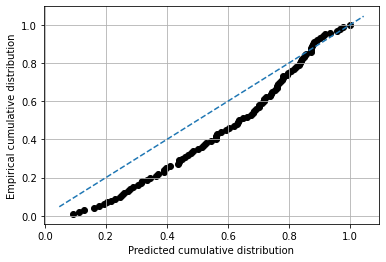

End2end test calibration error when step size is 0.001:  13.249463775510202
End2end test calibration error when step size is 0.01:  1.3271122448979589
End2end test calibration error when step size is 0.1:  0.1303571428571428


In [5]:
mean_pred, var_pred = end2end_model(x_test)
mean_pred = mean_pred.detach().numpy() * y_sd.detach().numpy()+ y_mean.detach().numpy()
var_pred = var_pred.detach().numpy() * torch.pow(y_sd, 2).detach().numpy()
sd_pred = np.sqrt(var_pred)

print('End2end test MAPE: ', metrics.mape(y_test.detach().numpy(), mean_pred))
print('End2end test RMSE: ', metrics.rmse(y_test.detach().numpy(), mean_pred))
print('End2end test NLLK: ', metrics.nllk(y_test.detach().numpy(), mean_pred, var_pred))
print('End2end test CRPS: ', metrics.CRPSMetric(x = y_test.squeeze(dim = 1), loc = torch.tensor(mean_pred).squeeze(dim = 1), scale = torch.tensor(sd_pred).squeeze(dim = 1)).gaussian_crps().mean())

pcdf = metrics.pcdf(mean_pred.squeeze(1), var_pred.squeeze(1), y_test.detach().numpy().squeeze(1))
metrics.draw_pcdf(pcdf)
print('End2end test calibration error when step size is 0.001: ', metrics.calibration_error(pcdf, step = 0.001))
print('End2end test calibration error when step size is 0.01: ', metrics.calibration_error(pcdf, step = 0.01))
print('End2end test calibration error when step size is 0.1: ', metrics.calibration_error(pcdf, step = 0.1))

In [6]:
print(uct.metrics.get_all_metrics(mean_pred.squeeze(1), sd_pred.squeeze(1), y_test.detach().numpy().squeeze(1)))

 (1/n) Calculating accuracy metrics
 (2/n) Calculating average calibration metrics


 20%|████████▌                                  | 2/10 [00:00<00:00, 11.93it/s]

 (3/n) Calculating adversarial group calibration metrics
  [1/2] for mean absolute calibration error
Measuring adversarial group calibration by spanning group size between 0.0 and 1.0, in 10 intervals


 20%|████████▌                                  | 2/10 [00:00<00:00, 11.62it/s]

  [2/2] for root mean squared calibration error
Measuring adversarial group calibration by spanning group size between 0.0 and 1.0, in 10 intervals


100%|██████████████████████████████████████████| 10/10 [00:00<00:00, 11.13it/s]

 (4/n) Calculating sharpness metrics
 (n/n) Calculating proper scoring rule metrics
**Finished Calculating All Metrics**


===================== Accuracy Metrics =====================
  MAE           4.368
  RMSE          6.362
  MDAE          2.996
  MARPD         14.336
  R2            0.856
  Correlation   0.930
=============== Average Calibration Metrics ================
  Root-mean-squared Calibration Error   0.101
  Mean-absolute Calibration Error       0.086
  Miscalibration Area                   0.087
========== Adversarial Group Calibration Metrics ===========
  Mean-absolute Adversarial Group Calibration Error
     Group Size: 0.11 -- Calibration Error: 0.166
     Group Size: 0.56 -- Calibration Error: 0.117
     Group Size: 1.00 -- Calibration Error: 0.086
  Root-mean-squared Adversarial Group Calibration Error
     Group Size: 0.11 -- Calibration Error: 0.180
     Group Size: 0.56 -- Calibration Error: 0.130
     Group Size: 1.00 -- Calibration Error: 0.101
===============

Lims is None. Setting lims now:
min_max_true: (2.33, 80.2)
min_max_pred: (6.7955685, 79.193405)
lims: (2.33, 80.2)
lims_ext: (-5.456999588012696, 87.98699645996093)


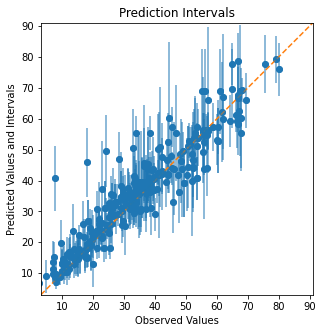

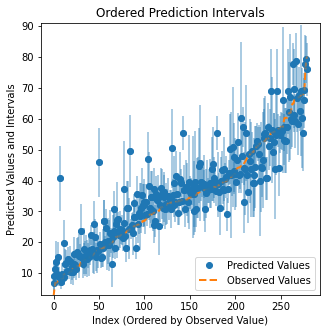

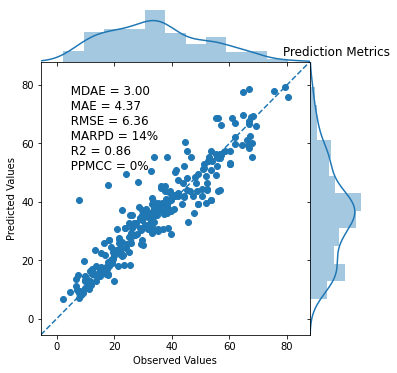

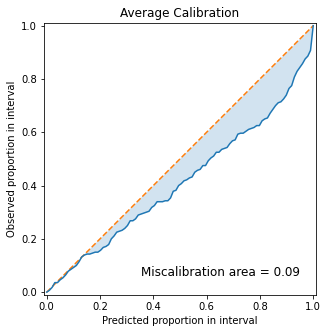

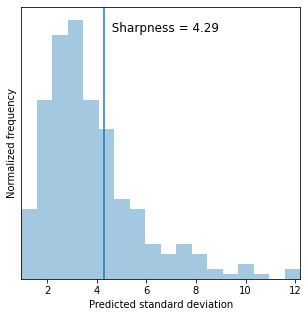

In [7]:
y = y_test.detach().numpy().squeeze(1)

uviz.plot_intervals(mean_pred.squeeze(1), sd_pred.squeeze(1), y)
uviz.plot_intervals_ordered(mean_pred.squeeze(1), sd_pred.squeeze(1), y)
uviz.plot_parity(mean_pred.squeeze(1), y)
uviz.plot_calibration(mean_pred.squeeze(1), sd_pred.squeeze(1), y)
uviz.plot_sharpness(sd_pred.squeeze(1))

In [4]:
nllk_model = end2end_crps.train_model_nllk(x_train, y_train, n_epoch = 500, hidden_layers = [50, 50], learning_rate = 0.001)

initial loss:  0.9810490012168884
final loss:  -2.1350696086883545


End2end test MAPE:  0.16133666
End2end test RMSE:  6.0917354
End2end test NLLK:  5.0582643
End2end test CRPS:  tensor(3.1531)


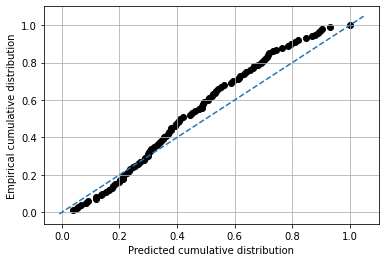

End2end test calibration error when step size is 0.001:  5.85365867346939
End2end test calibration error when step size is 0.01:  0.5841632653061227
End2end test calibration error when step size is 0.1:  0.0541836734693878


In [6]:
mean_pred, var_pred = nllk_model(x_test)
mean_pred = mean_pred.detach().numpy() * y_sd.detach().numpy()+ y_mean.detach().numpy()
var_pred = var_pred.detach().numpy() * torch.pow(y_sd, 2).detach().numpy()
sd_pred = np.sqrt(var_pred)

print('End2end test MAPE: ', metrics.mape(y_test.detach().numpy(), mean_pred))
print('End2end test RMSE: ', metrics.rmse(y_test.detach().numpy(), mean_pred))
print('End2end test NLLK: ', metrics.nllk(y_test.detach().numpy(), mean_pred, var_pred))
print('End2end test CRPS: ', metrics.CRPSMetric(x = y_test.squeeze(dim = 1), loc = torch.tensor(mean_pred).squeeze(dim = 1), scale = torch.tensor(sd_pred).squeeze(dim = 1)).gaussian_crps().mean())

pcdf = metrics.pcdf(mean_pred.squeeze(1), var_pred.squeeze(1), y_test.detach().numpy().squeeze(1))
metrics.draw_pcdf(pcdf)
print('End2end test calibration error when step size is 0.001: ', metrics.calibration_error(pcdf, step = 0.001))
print('End2end test calibration error when step size is 0.01: ', metrics.calibration_error(pcdf, step = 0.01))
print('End2end test calibration error when step size is 0.1: ', metrics.calibration_error(pcdf, step = 0.1))

In [7]:
print(uct.metrics.get_all_metrics(mean_pred.squeeze(1), sd_pred.squeeze(1), y_test.detach().numpy().squeeze(1)))

 (1/n) Calculating accuracy metrics
 (2/n) Calculating average calibration metrics


 20%|████████▌                                  | 2/10 [00:00<00:00, 11.97it/s]

 (3/n) Calculating adversarial group calibration metrics
  [1/2] for mean absolute calibration error
Measuring adversarial group calibration by spanning group size between 0.0 and 1.0, in 10 intervals


 20%|████████▌                                  | 2/10 [00:00<00:00, 12.01it/s]

  [2/2] for root mean squared calibration error
Measuring adversarial group calibration by spanning group size between 0.0 and 1.0, in 10 intervals


100%|██████████████████████████████████████████| 10/10 [00:00<00:00, 11.32it/s]

 (4/n) Calculating sharpness metrics
 (n/n) Calculating proper scoring rule metrics
**Finished Calculating All Metrics**


===================== Accuracy Metrics =====================
  MAE           4.277
  RMSE          6.092
  MDAE          3.024
  MARPD         14.479
  R2            0.868
  Correlation   0.932
=============== Average Calibration Metrics ================
  Root-mean-squared Calibration Error   0.106
  Mean-absolute Calibration Error       0.094
  Miscalibration Area                   0.095
========== Adversarial Group Calibration Metrics ===========
  Mean-absolute Adversarial Group Calibration Error
     Group Size: 0.11 -- Calibration Error: 0.184
     Group Size: 0.56 -- Calibration Error: 0.116
     Group Size: 1.00 -- Calibration Error: 0.094
  Root-mean-squared Adversarial Group Calibration Error
     Group Size: 0.11 -- Calibration Error: 0.213
     Group Size: 0.56 -- Calibration Error: 0.138
     Group Size: 1.00 -- Calibration Error: 0.106
===============

Lims is None. Setting lims now:
min_max_true: (2.33, 80.2)
min_max_pred: (4.0374794, 77.061844)
lims: (2.33, 80.2)
lims_ext: (-5.456999588012696, 87.98699645996093)


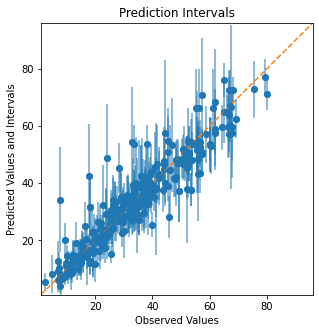

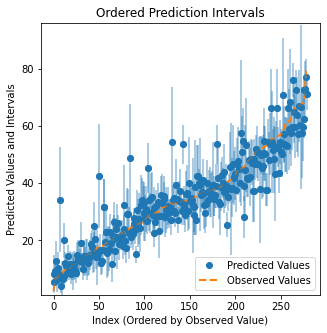

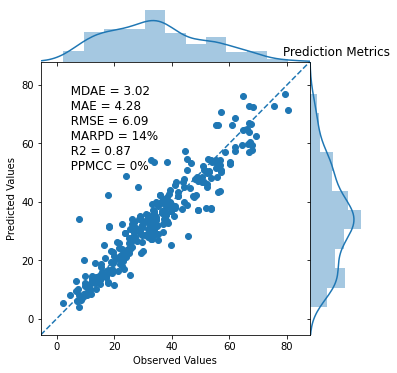

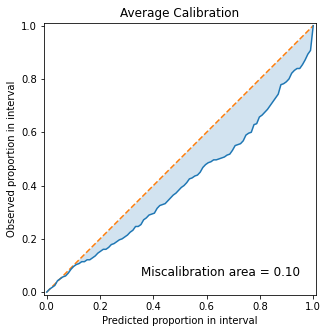

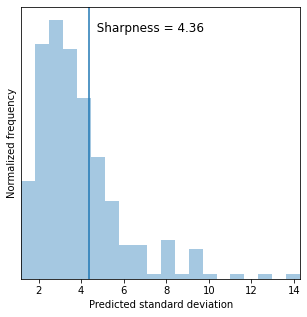

In [8]:
y = y_test.detach().numpy().squeeze(1)

uviz.plot_intervals(mean_pred.squeeze(1), sd_pred.squeeze(1), y)
uviz.plot_intervals_ordered(mean_pred.squeeze(1), sd_pred.squeeze(1), y)
uviz.plot_parity(mean_pred.squeeze(1), y)
uviz.plot_calibration(mean_pred.squeeze(1), sd_pred.squeeze(1), y)
uviz.plot_sharpness(sd_pred.squeeze(1))

In [9]:
crps_model = end2end_crps.train_model_crps(x_train, y_train, n_epoch = 500, hidden_layers = [50, 50], learning_rate = 0.001)

initial loss:  0.5788084268569946
final loss:  0.12956009805202484


End2end test MAPE:  0.15367846
End2end test RMSE:  6.0008354
End2end test NLLK:  5.26766
End2end test CRPS:  tensor(3.2800)


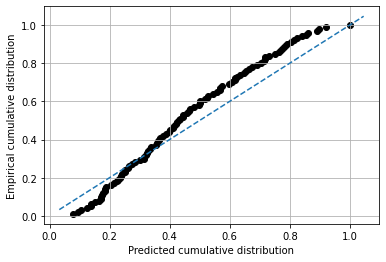

End2end test calibration error when step size is 0.001:  5.791688265306124
End2end test calibration error when step size is 0.01:  0.5785765306122451
End2end test calibration error when step size is 0.1:  0.05264030612244901


In [10]:
mean_pred, var_pred = crps_model(x_test)
mean_pred = mean_pred.detach().numpy() * y_sd.detach().numpy()+ y_mean.detach().numpy()
var_pred = var_pred.detach().numpy() * torch.pow(y_sd, 2).detach().numpy()
sd_pred = np.sqrt(var_pred)

print('End2end test MAPE: ', metrics.mape(y_test.detach().numpy(), mean_pred))
print('End2end test RMSE: ', metrics.rmse(y_test.detach().numpy(), mean_pred))
print('End2end test NLLK: ', metrics.nllk(y_test.detach().numpy(), mean_pred, var_pred))
print('End2end test CRPS: ', metrics.CRPSMetric(x = y_test.squeeze(dim = 1), loc = torch.tensor(mean_pred).squeeze(dim = 1), scale = torch.tensor(sd_pred).squeeze(dim = 1)).gaussian_crps().mean())

pcdf = metrics.pcdf(mean_pred.squeeze(1), var_pred.squeeze(1), y_test.detach().numpy().squeeze(1))
metrics.draw_pcdf(pcdf)
print('End2end test calibration error when step size is 0.001: ', metrics.calibration_error(pcdf, step = 0.001))
print('End2end test calibration error when step size is 0.01: ', metrics.calibration_error(pcdf, step = 0.01))
print('End2end test calibration error when step size is 0.1: ', metrics.calibration_error(pcdf, step = 0.1))

In [11]:
print(uct.metrics.get_all_metrics(mean_pred.squeeze(1), sd_pred.squeeze(1), y_test.detach().numpy().squeeze(1)))

 (1/n) Calculating accuracy metrics
 (2/n) Calculating average calibration metrics


 20%|████████▌                                  | 2/10 [00:00<00:00, 11.65it/s]

 (3/n) Calculating adversarial group calibration metrics
  [1/2] for mean absolute calibration error
Measuring adversarial group calibration by spanning group size between 0.0 and 1.0, in 10 intervals


 20%|████████▌                                  | 2/10 [00:00<00:00, 11.60it/s]

  [2/2] for root mean squared calibration error
Measuring adversarial group calibration by spanning group size between 0.0 and 1.0, in 10 intervals


100%|██████████████████████████████████████████| 10/10 [00:00<00:00, 11.05it/s]

 (4/n) Calculating sharpness metrics
 (n/n) Calculating proper scoring rule metrics
**Finished Calculating All Metrics**


===================== Accuracy Metrics =====================
  MAE           4.375
  RMSE          6.001
  MDAE          3.008
  MARPD         14.347
  R2            0.872
  Correlation   0.934
=============== Average Calibration Metrics ================
  Root-mean-squared Calibration Error   0.121
  Mean-absolute Calibration Error       0.110
  Miscalibration Area                   0.111
========== Adversarial Group Calibration Metrics ===========
  Mean-absolute Adversarial Group Calibration Error
     Group Size: 0.11 -- Calibration Error: 0.199
     Group Size: 0.56 -- Calibration Error: 0.130
     Group Size: 1.00 -- Calibration Error: 0.110
  Root-mean-squared Adversarial Group Calibration Error
     Group Size: 0.11 -- Calibration Error: 0.211
     Group Size: 0.56 -- Calibration Error: 0.154
     Group Size: 1.00 -- Calibration Error: 0.121
===============

Lims is None. Setting lims now:
min_max_true: (2.33, 80.2)
min_max_pred: (1.9489441, 76.649994)
lims: (1.9489441, 80.2)
lims_ext: (-5.876161193847657, 88.02510223388671)


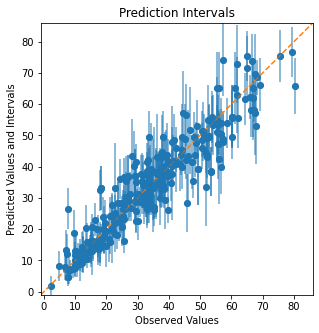

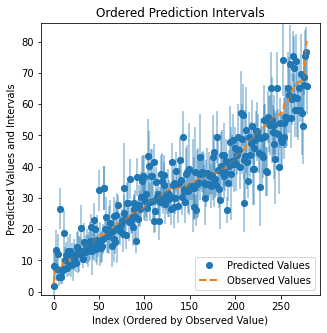

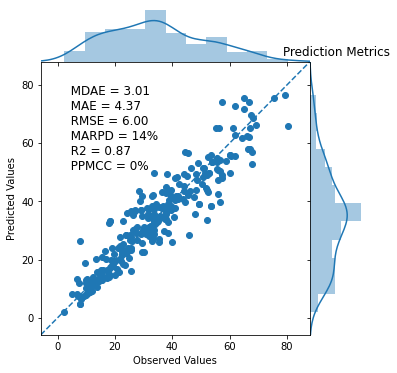

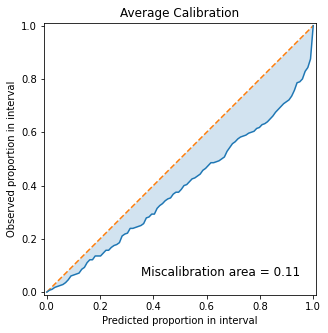

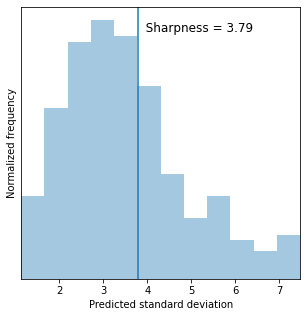

In [12]:
y = y_test.detach().numpy().squeeze(1)

uviz.plot_intervals(mean_pred.squeeze(1), sd_pred.squeeze(1), y)
uviz.plot_intervals_ordered(mean_pred.squeeze(1), sd_pred.squeeze(1), y)
uviz.plot_parity(mean_pred.squeeze(1), y)
uviz.plot_calibration(mean_pred.squeeze(1), sd_pred.squeeze(1), y)
uviz.plot_sharpness(sd_pred.squeeze(1))